##### Daniil Rolnik 334018009


___
# Decision Trees


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

## Global Variables

In [2]:
label_column_name = 'label'
d = defaultdict(LabelEncoder)

## Get the Data

In [3]:
headers = ['checking_status', 'saving_status', 'credit_history', 'housing', 'job', 'property_magnitude',
                'number_of_dependents', 'number_of_existing_credits', 'own_telephone', 'foreign_workers', 'label']
label_column_name = 'label'
d = defaultdict(LabelEncoder)
dataset = pd.read_csv("dataset/train.txt", header=None, names=headers)

In [4]:
df = pd.DataFrame(dataset,columns=headers)

In [5]:
df.head()

,checking_status,saving_status,credit_history,housing,job,property_magnitude,number_of_dependents,number_of_existing_credits,own_telephone,foreign_workers,label
0,x,n,e,r,h,l,1,1,y,y,G
1,b,m,d,o,h,c,1,4,y,y,B
2,x,g,e,o,s,c,1,1,n,y,G
3,x,g,e,o,s,l,1,1,n,y,G
4,n,b,c,o,u,l,1,2,n,n,G


In [6]:
dataset_test = pd.read_csv("dataset/test.txt", header=None, names=headers)
df_test = pd.DataFrame(dataset,columns=headers)

In [7]:
df_test.head()

,checking_status,saving_status,credit_history,housing,job,property_magnitude,number_of_dependents,number_of_existing_credits,own_telephone,foreign_workers,label
0,x,n,e,r,h,l,1,1,y,y,G
1,b,m,d,o,h,c,1,4,y,y,B
2,x,g,e,o,s,c,1,1,n,y,G
3,x,g,e,o,s,l,1,1,n,y,G
4,n,b,c,o,u,l,1,2,n,n,G


## Train Test Split

Split up the data into a training set and a test set!

In [8]:
y_train = df[label_column_name]
df = df.drop(label_column_name,axis=1)
X_train = df
y_test = df_test[label_column_name]

df_test = df_test.drop(label_column_name,axis=1)
X_test = df_test
print(f'X_train num of features = {len(X_train.columns)}')
print(f'X_test num of features = {len(X_test.columns)}')
X_train.head()
X_test.head()

X_train num of features = 10
X_test num of features = 10


,checking_status,saving_status,credit_history,housing,job,property_magnitude,number_of_dependents,number_of_existing_credits,own_telephone,foreign_workers
0,x,n,e,r,h,l,1,1,y,y
1,b,m,d,o,h,c,1,4,y,y
2,x,g,e,o,s,c,1,1,n,y
3,x,g,e,o,s,l,1,1,n,y
4,n,b,c,o,u,l,1,2,n,n


## Decision Trees

We'll start just by training a single decision tree.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier(criterion = 'entropy')

In [11]:
# Encoding the variable
X_train = df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
X_train.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
df.apply(lambda x: d[x.name].transform(x))

# Encoding the variable
X_test = df.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
X_test.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
df.apply(lambda x: d[x.name].transform(x))

,checking_status,saving_status,credit_history,housing,job,property_magnitude,number_of_dependents,number_of_existing_credits,own_telephone,foreign_workers
0,3,3,3,2,0,1,0,0,1,1
1,0,2,2,1,0,0,0,3,1,1
2,3,1,3,1,2,0,0,0,0,1
3,3,1,3,1,2,1,0,0,0,1
4,2,0,1,1,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
498,2,0,3,2,2,1,0,0,0,1
499,2,0,0,2,2,0,0,0,0,0
500,3,3,3,0,2,2,1,0,0,1
501,3,0,1,1,2,0,0,1,1,1


In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [15]:
conf_matrix=confusion_matrix(y_test,predictions)
accuracy=accuracy_score(y_test,predictions)

In [16]:
#### print decision tree accuracy
conf_matrix,accuracy

(array([[138,   8],
        [ 24, 333]], dtype=int64), 0.9363817097415507)

In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           B       0.85      0.95      0.90       146
           G       0.98      0.93      0.95       357

    accuracy                           0.94       503
   macro avg       0.91      0.94      0.93       503
weighted avg       0.94      0.94      0.94       503



In [18]:
print(confusion_matrix(y_test,predictions))

[[138   8]
 [ 24 333]]


## Tree Visualization


In [19]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[:])
features

C:\Users\DAN\Anaconda3\envs\ML_HW4\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['checking_status',
 'saving_status',
 'credit_history',
 'housing',
 'job',
 'property_magnitude',
 'number_of_dependents',
 'number_of_existing_credits',
 'own_telephone',
 'foreign_workers']

### Full Tree visualization

In [20]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True, class_names=['B','G'])



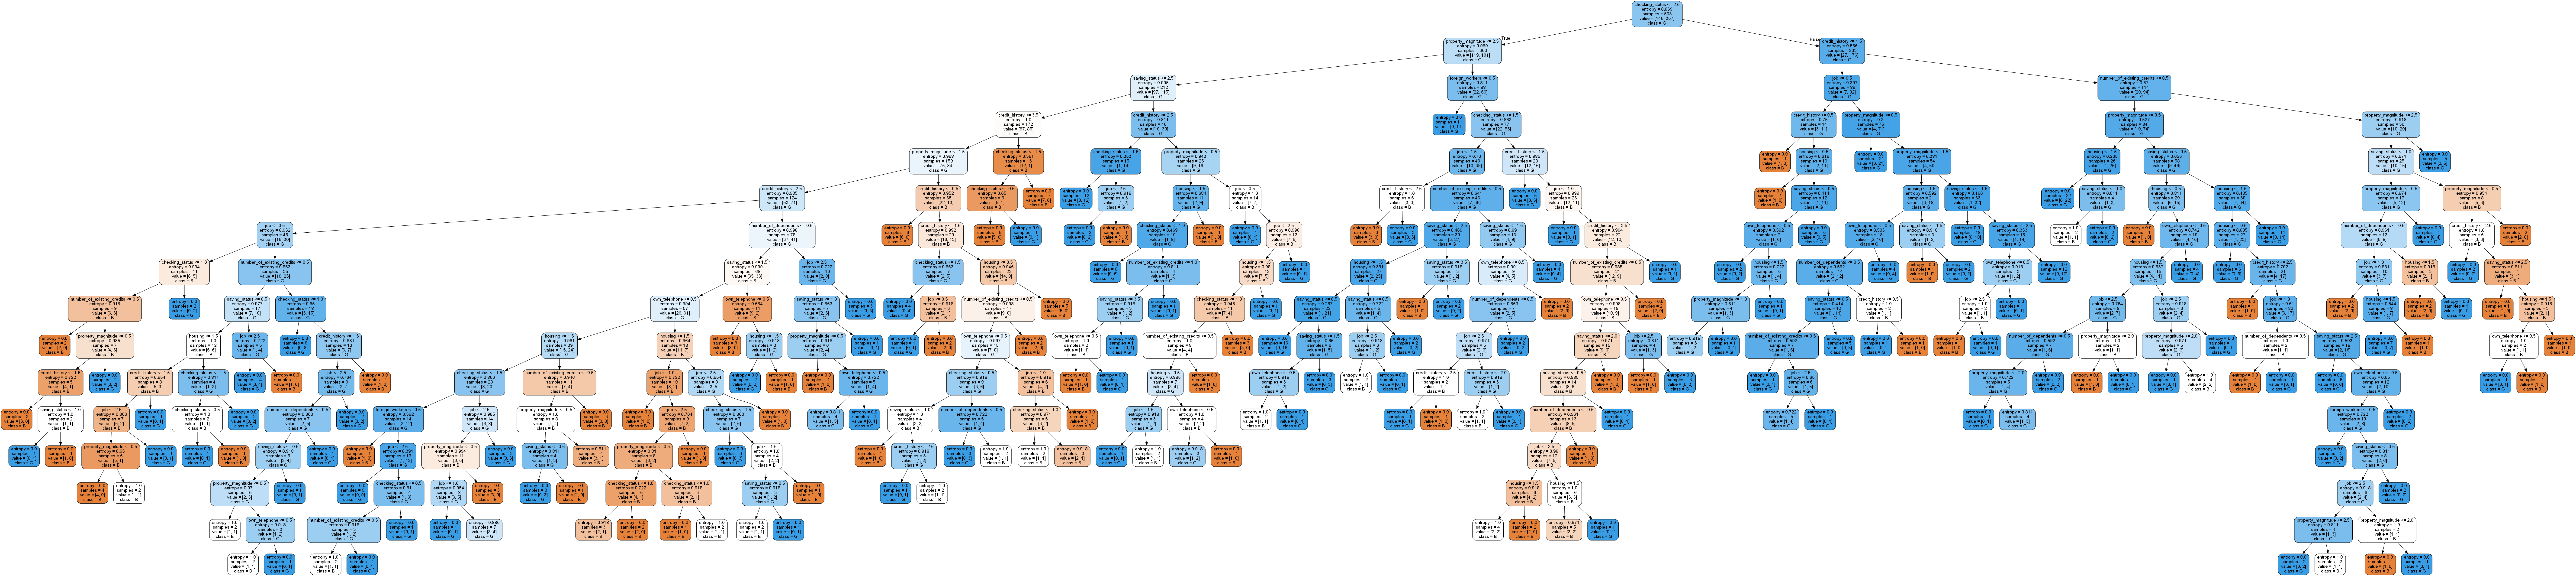

In [21]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
print(graph)
graph[0].write_png('full-decision_tree.png')
Image(graph[0].create_png())  

### Final Tree visualization

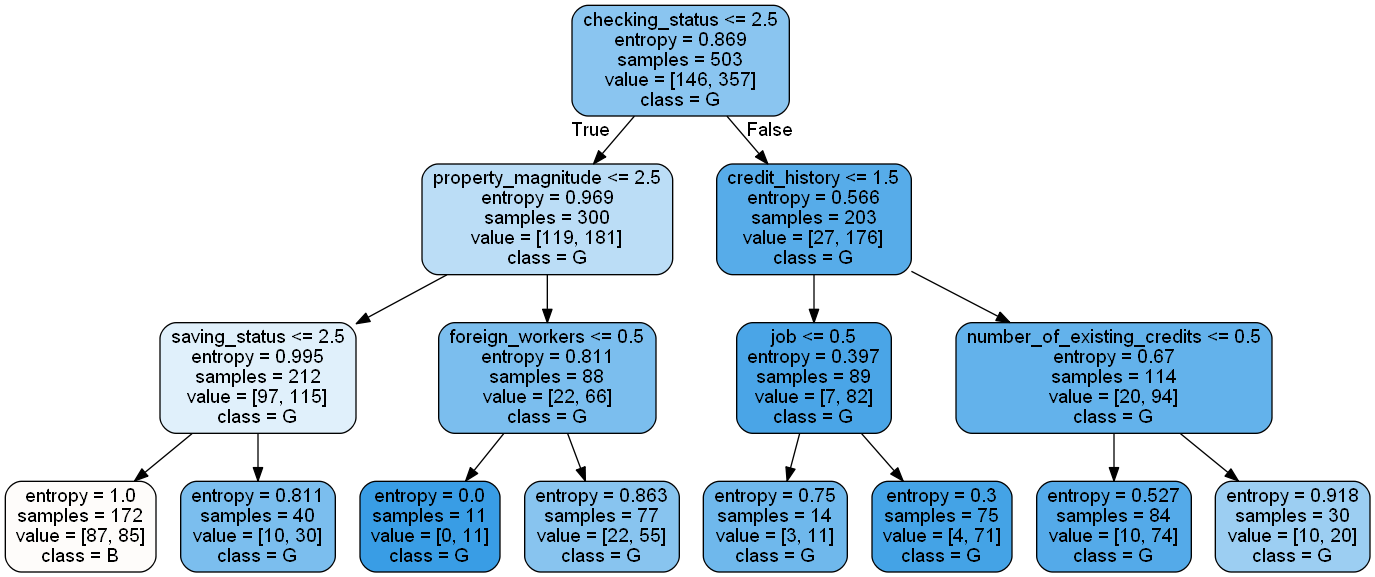

In [22]:
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dtree.fit(X_train,y_train)
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True, class_names=['B','G'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
print(graph)
graph[0].write_png('final_decision_tree.png')
Image(graph[0].create_png())